# Cross Validation With SKLearn

### by Meysam Amini

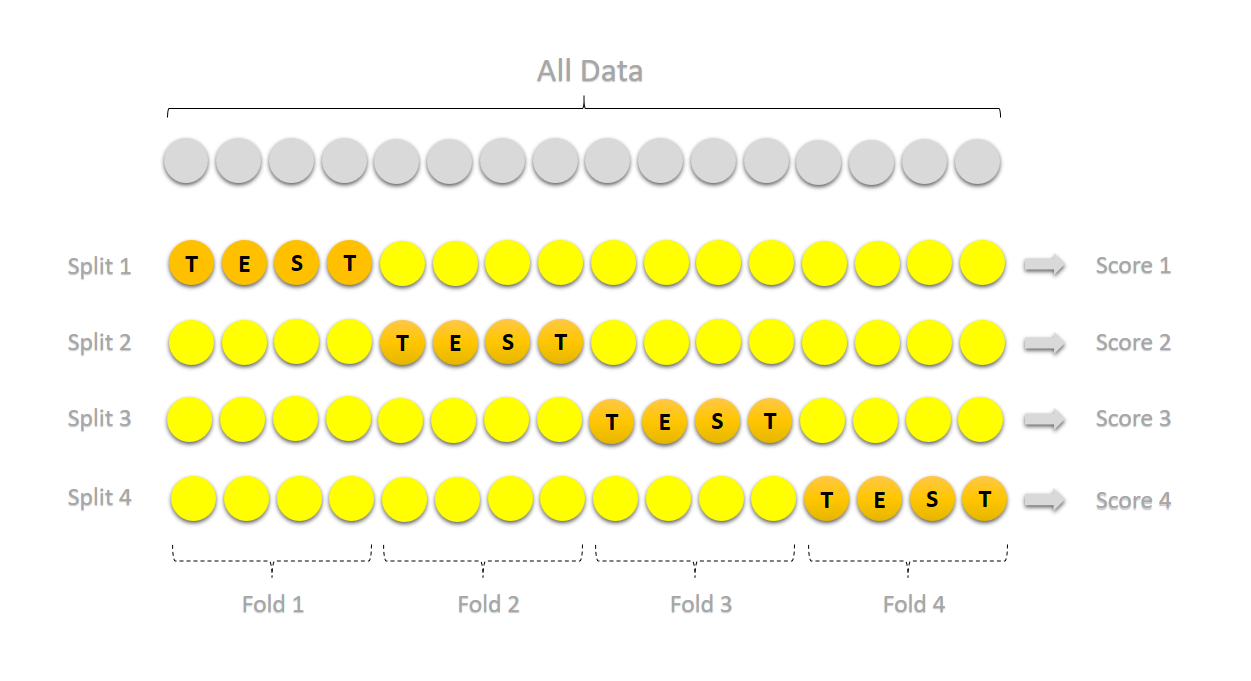

## <div dir="rtl"> اینجا هر بار دیتاستمون رو با یه نسبت دلخواه تقسیم کردیم و مدلمون رو با یه بخش از دیتا train و با یه بخش دیگه test کردیم:

In [9]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np


X, Y = datasets.load_iris(return_X_y=True,as_frame=True)
model= SVC(random_state=20)

In [177]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3)

model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9111111111111111

In [178]:
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.4)

model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9333333333333333

In [181]:
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.2)

model.fit(X_train,y_train)
model.score(X_test,y_test)

1.0

## <div dir="rtl"> قطعه کدای زیر مثالی از ساده‌ترین splitter هستن بنام KFold، که تو مواقعی که دیتاهامون هیچ ترتیب زمانی یا هیچ ارتباط گروهی‌ای باهم ندارن(تاثیر وجود این ارتباط رو هم بعدا بررسی میکنیم)، استفاده میشه و خروجیشو میبینید:

In [2]:
from sklearn.model_selection import KFold

samples = ['a','b','c','d','e','f','g','h','i']

kf_no_shuffle = KFold(n_splits=3)

for train,test in kf_no_shuffle.split(samples):
    print("train:%s , test:%s" % (train,test))

train:[3 4 5 6 7 8] , test:[0 1 2]
train:[0 1 2 6 7 8] , test:[3 4 5]
train:[0 1 2 3 4 5] , test:[6 7 8]


In [239]:
kf_shuffle = KFold(n_splits=3,shuffle=True)

for train,test in kf_shuffle.split(samples):
    print(f"train:%s , test:%s" % (train,test))

train:[0 1 2 3 4 7] , test:[5 6 8]
train:[1 3 5 6 7 8] , test:[0 2 4]
train:[0 2 4 5 6 8] , test:[1 3 7]


## <div dir="rtl"> خب، حالا فرض کنید با این splitterها میخوایم روی دیتاستمون cross validation انجام بدیم و درواقع مدلمون رو با زیر مجموعه‌های مختلفی از feature‌ها (X) و label‌ها (Y) مون ، train و test کنیم. بدون shuffle دیتامون(هم X و هم Y) به این شکل تقسیم میشه:

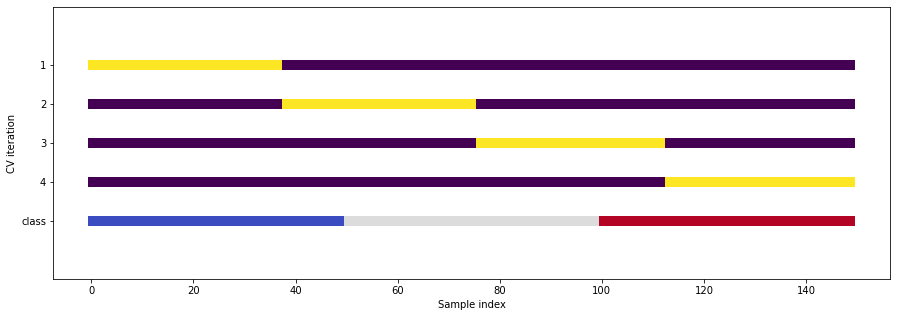

In [10]:
kf_no_shuffle = KFold(n_splits=4,shuffle=False)

plot_cv(kf_no_shuffle,X,Y)

## <div dir="rtl"> این splitter ها میتونن بعنوان ورودی"cv" در توابع cross_validate ، cross_val_score و  GridSearchCV و امثال اینا پاس داده بشن:

In [106]:
from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV,

model = GridSearchCV(
    estimator=model_to_tune, param_grid=param_grid, cv=kf_shuffle)

test_score = cross_val_score(model, X,Y, cv=kf_shuffle)

cv_results=cross_validate(model, X,Y, cv=kf_shuffle)


## <div dir="rtl"> فانکشن GridSearchCV  :

In [215]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {"C": [0.1, 1, 10], "gamma": [.01, .1]}
model_to_tune = SVC()

search = GridSearchCV(estimator=model_to_tune, param_grid=param_grid)
search.fit(data, target)

print(search.best_estimator_)

SVC(C=1, gamma=0.1)


## <div dir="rtl"> فانکشن cross_validate  :

In [226]:
from sklearn.model_selection import cross_validate

cv_results=cross_validate(model,data,target,cv=KFold(n_splits=4),return_train_score=True)
cv_results

{'fit_time': array([0.01562405, 0.        , 0.01562524, 0.        ]),
 'score_time': array([0., 0., 0., 0.]),
 'test_score': array([1.        , 0.92105263, 0.91891892, 0.62162162]),
 'train_score': array([0.96428571, 0.96428571, 0.98230088, 0.96460177])}

## <div dir="rtl"> فانکشن cross_val_score  :

In [228]:
cross_val_score(model, data, target)

array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 1.        ])

## <div dir="rtl"> حالا که تا اینجا اومدین، بد نیست نحوه split کردن خوده همین StratifiedKFold رو هم ببینید:

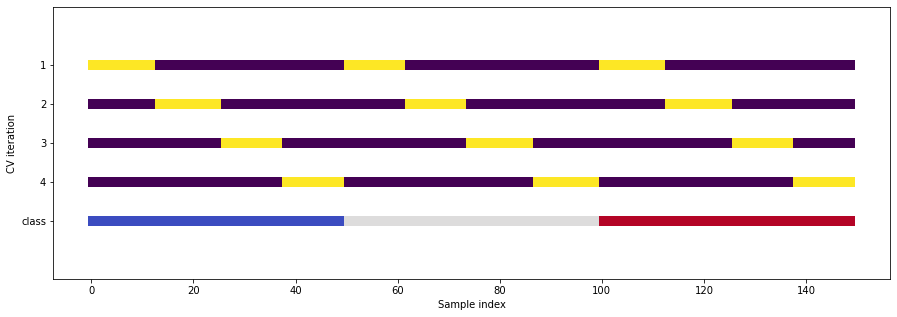

In [11]:
from sklearn.model_selection import StratifiedKFold

str_kf_no_shuffle = StratifiedKFold(n_splits=4,shuffle=False)

plot_cv(str_kf_no_shuffle,X,Y)

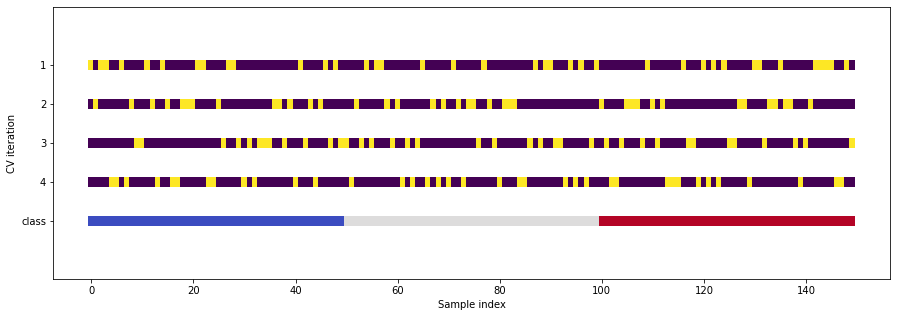

In [12]:
from sklearn.model_selection import StratifiedKFold

str_kf_no_shuffle = StratifiedKFold(n_splits=4,shuffle=True)

plot_cv(str_kf_no_shuffle,X,Y)

## <div dir="rtl"> اینم تابعی که ازش برای رسم شکلها استفاده کردیم :

In [4]:
def plot_cv(cv, X, Y, lw=10):
    
    n_splits=cv.get_n_splits()
    fig, ax = plt.subplots(figsize=(15,5))
    cmap_data = plt.cm.coolwarm
#     cmap_cv = plt.cm.Wistia


    for num_splits, (train, test) in enumerate(cv.split(X=X,y=Y)):
            # Fill in indices with the training/test groups
            k_split_indices = np.zeros(len(X))
            k_split_indices[test] = 1

            # Visualize the results
            ax.scatter(range(len(k_split_indices)), [num_splits] * len(k_split_indices),
                       c=k_split_indices, marker='_', lw=lw
                      )
    ax.scatter(range(len(X)), [num_splits + 1] * len(X),c=Y,
                   marker='_', lw=lw,cmap=cmap_data)

    # Formatting
    yticklabels = list(range(1,n_splits+1)) + ['class']
    ax.set(yticks=np.arange(n_splits+1), yticklabels=yticklabels,
               xlabel='Sample index', ylabel="CV iteration",
               ylim=[n_splits+1.5, -1.5]
              )
        

## [Source](https://scikit-learn.org/stable/modules/cross_validation.html) 

# Nested Cross Validation

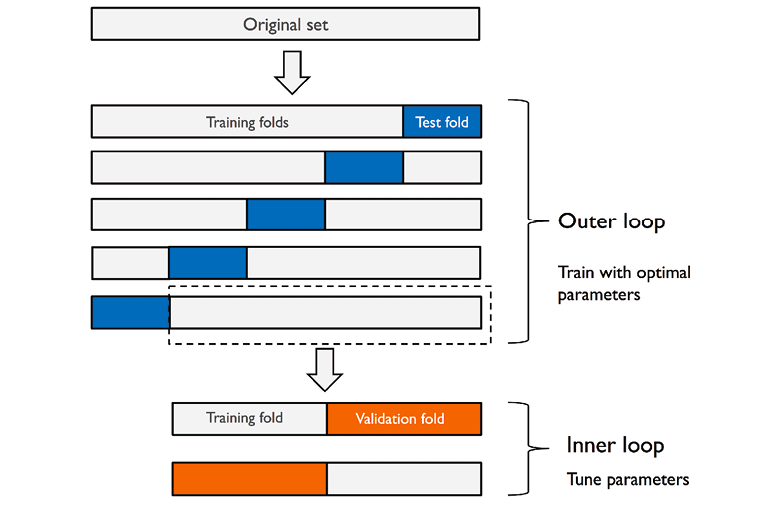

### <div dir="rtl"> تو قطعه کد زیر، داخل حلقه for دوتا splitter ساده تعریف کردیم(با توجه به اینکه میدونیم داده‌هامون ارتباط گروهی و ... ندارن) و هر بار یه random state جدید در نظر میگیریم و بهترین score  مربوط به GridSearch و میانگین score مربوط به nested cros_val_score رو تو دوتا آرایه جُدا ذخیره کردیم. و نهایتا خارج حلقه، اعداد این دو آرایه رو رسم کردیم:

In [3]:
from sklearn.model_selection import cross_val_score ,cross_validate ,GridSearchCV,KFold
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
import numpy as np

X, Y = datasets.load_iris(return_X_y=True,as_frame=True)

model_to_tune= SVC(random_state=20)

p_grid = {"C": [1, 10, 100],
          "gamma": [.01, .1]}

num_itrations=30
none_nested_scores=np.zeros(num_itrations)
nested_scores=np.zeros(num_itrations)


for i in range (num_itrations):
    
    # Declare the inner and outer cross-validation
    inner_cv = KFold(n_splits=2, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=2, shuffle=True, random_state=i)

    # Inner cross-validation for parameter search
    param_search_cv = GridSearchCV(
        estimator=model_to_tune, param_grid=p_grid, cv=inner_cv, n_jobs=-1)
    
    param_search_cv.fit(X,Y)
    
    none_nested_scores[i]=param_search_cv.best_score_

    # Outer cross-validation to compute the testing score
    nested_score = cross_val_score(param_search_cv,X=X,y=Y, cv=outer_cv, n_jobs=-1)
    
    nested_scores[i]=nested_score.mean()


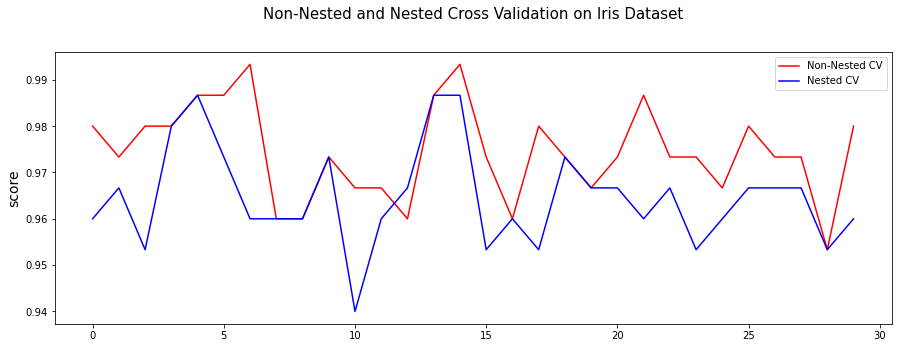

In [4]:
plt.figure(figsize=(15,5))
plt.plot(none_nested_scores, color='r')
plt.plot(nested_scores, color='b')
plt.ylabel("score", fontsize="14")
plt.legend(["Non-Nested CV", "Nested CV"])
plt.title("Non-Nested and Nested Cross Validation on Iris Dataset",
          x=.5, y=1.1, fontsize="15")
plt.show()

## [Source](https://scikit-learn.org/stable/auto_examples/model_selection/plot_nested_cross_validation_iris.html) 